In [8]:
#import necessary packages
import networkx as nx
import numpy as np
from community import community_louvain #pip install python-louvain package
import leidenalg as la
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt

<h1>Read and format the data</h1>

In [12]:
# Load the exported Web of Science file
wos_data_orig = pd.read_csv('data/wos_export_test2.csv')

#remove NANs from the Cited References Column
wos_data = wos_data_orig[wos_data_orig['CR'].notnull()]

# Extract cited references and reformat in to a list of sources (cited paper) and targets (citing paper) **need to check this is correct behaviour**
cited_references = []
for index, row in wos_data.iterrows():
    refs = row['CR'].split('; ')
    for ref in refs:
        print(ref)
        cited_references.append({
            'source': row['DI'], #trying to get DOI
            'target': ref
        })

# Create a DataFrame
citation_data = pd.DataFrame(cited_references)

# Save to a new CSV file
citation_data.to_csv('citation_data.csv', index=False)

[Anonymous], 2006, ENVISIONING INFORM
[Anonymous], BOARD GOVERNORS FEDE
DECAMPO A, 2007, P 2007 INT C AUD DIS
Dowling W.J., 1986, MUSIC COGNITION
FERGUSON S, GENETIC SONIFICATION
GAYER WW, 1989, HUMAN COMPUTER INTER, V4, P67
HERMANN T, 1999, INT I ADV STUDIES SY, P189
MacKAY D.J. C., 2004, Information Theory, Inference, and Learning Algorithms
MCCARTNEY J, 1996, P 1996 INT COMP MUS
PETERSON Gordon E., 1952, J ACOUST SOC AM, V24, P75
POLLACK I, 1953, J ACOUST SOC AM, V25, P765, DOI 10.1121/1.1907173
Pynchon Thomas., 1973, Gravity's Rainbow
RAMAKRISHNAN C, ENTROPY SONIFICATION
RASKIN J, 2007, HUMANE INTERFACE
Roads C., 2004, Microsound
Shannon C., 1949, MATH THEORY INFORM
SMITH DR, 2002, P 2002 INT C AUD DIS
TRONDLE M, EMOTION
Tufte E.R., 2007, The Visual Display of Quantitative Information
Tufte EdwardR., 2005, Visual Explanations
VONSYDOW B, 2008, MONO BI TRIGRAM FREQ
*WIK CONTR, 2008, TED SPREAD WIK FREE
Bach DR, 2008, CEREB CORTEX, V18, P145, DOI 10.1093/cercor/bhm040
Barrass S., 199

In [11]:
citation_data.info()
print(citation_data['source'])

<class 'pandas.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   source  1445 non-null   str  
 1   target  1596 non-null   str  
dtypes: str(2)
memory usage: 25.1 KB
0                            NaN
1                            NaN
2                            NaN
3                            NaN
4                            NaN
                  ...           
1591    10.1504/IJNT.2019.106628
1592    10.1504/IJNT.2019.106628
1593    10.1504/IJNT.2019.106628
1594    10.1504/IJNT.2019.106628
1595    10.1504/IJNT.2019.106628
Name: source, Length: 1596, dtype: str


<h1>Perform the community analysis</h1>

In [6]:
#read in data, in format of source (citing paper) and target (cited paper)
citation_data = pd.read_csv('citation_data_fake.csv')

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(citation_data[['source', 'target']].values)

# Convert the NetworkX graph to an iGraph object
g = ig.Graph.TupleList(G.edges(), directed=True)

# Perform Leiden community detection
partition = la.find_partition(g, la.ModularityVertexPartition, n_iterations=10)

# Get the community assignments
community_ids = partition.membership

<h1>Get community metrics and print results data</h1>

In [7]:
#Print overview of communities identied
print("")
print("----Partition Overview----")
print("Number of papers:",len(community_ids))
print("Number of communities:",max(community_ids)+1)
print("")

# Create a dictionary mapping nodes to community IDs
node_community = {node: community_id for node, community_id in zip(G.nodes(), community_ids)}

# Calculate community metrics (e.g., size, density)
community_metrics = {}
for community_id in set(community_ids):
    #get number of papers (nodes) in each community
    community_nodes = [node for node, cid in node_community.items() if cid == community_id]
    #get density in each node [what is this?!?!]
    community_graph = G.subgraph(community_nodes)
    community_metrics[community_id] = {
        'size': len(community_nodes),
        'density': nx.density(community_graph)
    }

# Print community metrics (number of papers in each community and the density)
for community_id, metrics in community_metrics.items():
    print(f"Community {community_id}: size={metrics['size']}, density={metrics['density']}")
print("-------------")
print("")


----Partition Overview----
Number of papers: 26
Number of communities: 5

Community 0: size=7, density=0.9761904761904762
Community 1: size=6, density=0.13333333333333333
Community 2: size=5, density=0.3
Community 3: size=4, density=0.25
Community 4: size=4, density=0.5
-------------



<h1>Make figure</h1>


[[0, 0, 2, 0, 0, 0, 0, 0, 2, 4, 2, 2, 2, 3, 3, 4, 3, 3, 4, 4, 1, 1, 1, 1, 1, 1]]


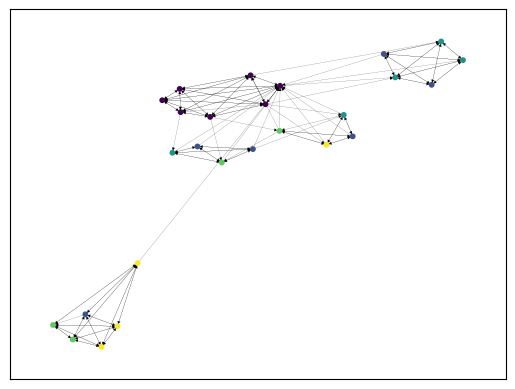

In [8]:
#here would like to obtain the number of edges to each node and size the nodes by this

# Sort out colors to match the community IDs ***not working**
colors = [community_ids]
print("")
print(colors)
    

#Plotting options
options = {
    'node_size': 10,
    'width': 0.1,
    'arrowsize': 5,
    'with_labels': False
}

nx.draw_networkx(G, pos = nx.spring_layout(G), node_color=colors, cmap='viridis', **options)

plt.savefig("output.png",dpi=300)
plt.show()